# Ciencia de Datos en Python
## Proyecto #1

### Creacion de entorno virtual en Anaconda 

In [1]:
# conda create --name regression_1 python=3.8 numpy pandas matplotlib seaborn scikit-learn
# conda activate regression_1

In [17]:
# Carga de librerias 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Cargar datos
data = np.load('proyecto_training_data.npy')

# Calculo del 80% para la division de los datos.
split_index = int(len(data) * 0.8)

# Division del dataset para 'entrenamiento y validación'
train_data = data[:split_index]
test_data = data[split_index:]

# Verificación de las subdimensiones para corroborar los conjuntos de datos
print(f'Dataset completo: {data.shape}')
print(f'Set de entrenamiento: {train_data.shape}')
print(f'Set de validación: {test_data.shape}')

Dataset completo: (1460, 6)
Set de entrenamiento: (1168, 6)
Set de validación: (292, 6)


array([[2.0850e+05, 7.0000e+00, 8.5600e+02, 8.0000e+00, 2.0030e+03,
        6.5000e+01],
       [1.8150e+05, 6.0000e+00, 1.2620e+03, 6.0000e+00, 1.9760e+03,
        8.0000e+01],
       [2.2350e+05, 7.0000e+00, 9.2000e+02, 6.0000e+00, 2.0010e+03,
        6.8000e+01],
       ...,
       [2.3317e+05, 7.0000e+00, 1.5020e+03, 7.0000e+00, 2.0090e+03,
        7.9000e+01],
       [2.4535e+05, 8.0000e+00, 1.6940e+03, 7.0000e+00, 2.0080e+03,
        6.4000e+01],
       [1.7300e+05, 6.0000e+00, 9.5900e+02, 7.0000e+00, 2.0000e+03,
        5.8000e+01]])

## Análisis exploratorio de datos

In [14]:
# Convsersión de datos 'entrenamiento'en un Dataframe y asignacion de nombre a las variables. 
column_names = ['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'VariableY']
train_df = pd.DataFrame(train_data, columns=column_names)

# Calculo de estadísticas descriptivas para cada variable
descriptive_stats = train_df.describe()

# Calcular el rango (peak-to-peak) para cada variable
ranges = train_df.max() - train_df.min()

# Agregar el rango al DataFrame de estadísticas descriptivas
descriptive_stats.loc['range'] = ranges

descriptive_stats

,X_1,X_2,X_3,X_4,X_5,VariableY
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,962.000000
mean,180590.277397,6.101027,1156.323630,6.485445,1971.451199,69.946985
std,78815.697902,1.378025,373.780374,1.609141,29.951707,23.478161
min,34900.000000,1.000000,334.000000,2.000000,1875.000000,21.000000
25%,129900.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,162950.000000,6.000000,1086.000000,6.000000,1973.000000,70.000000
75%,214000.000000,7.000000,1390.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,3228.000000,14.000000,2010.000000,313.000000
range,720100.000000,9.000000,2894.000000,12.000000,135.000000,292.000000


In [23]:
train_df.head()

,X_1,X_2,X_3,X_4,X_5,VariableY
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


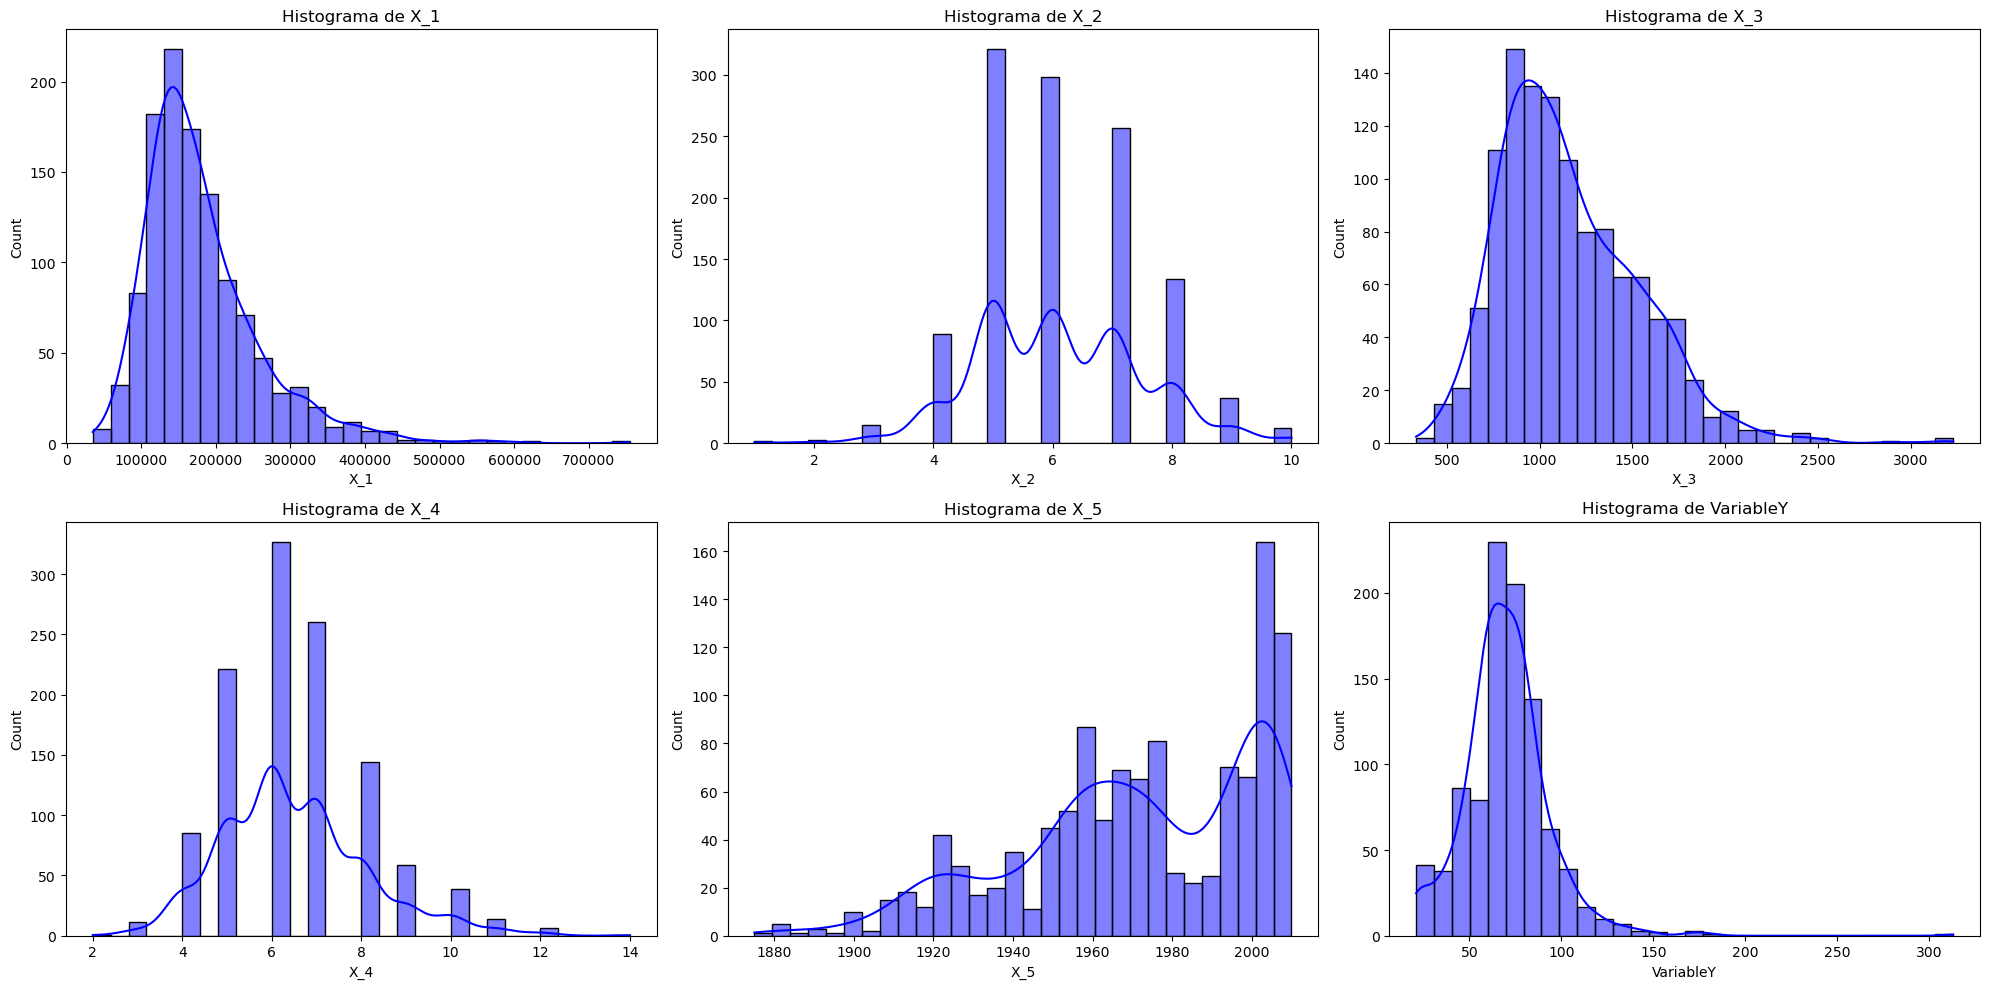

In [20]:
# Configuración para mejorar la visualización
plt.figure(figsize=(20, 10))

# Graficar histogramas para cada variable
for i, column in enumerate(train_df.columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(train_df[column].dropna(), kde=True, color = 'blue',
                 bins=30)  # Eliminacion de NAs para vizualizacion
    plt.title(f'Histograma de {column}')

plt.tight_layout()
plt.show()

istograma de Variable1: Dado que esta variable tiene un amplio rango y una desviación estándar significativa, esperaríamos ver una distribución con una amplia dispersión de datos. Dependiendo de la naturaleza de la variable, podría haber una concentración de datos hacia el extremo inferior (indicando un sesgo hacia valores más bajos) y posibles valores atípicos hacia el extremo superior.
Histograma de Variable2: Con una desviación estándar más pequeña en comparación con Variable1 y un rango relativamente estrecho, los datos podrían distribuirse más uniformemente. Si esta variable refleja una característica cualitativa ordenada o un conteo, podríamos ver picos en ciertos valores específicos.
Histograma de Variable3: Esta variable también muestra una variabilidad significativa. El histograma podría revelar una tendencia central con datos esparcidos a ambos lados, indicando una distribución normal o una distribución con una cola larga si hay una concentración de valores hacia un extremo.
Histograma de Variable4: La distribución de esta variable podría tener múltiples picos si representa categorías o clasificaciones con frecuencias variables. La presencia de un rango y una desviación estándar moderados sugiere una variabilidad considerable entre los valores.
Histograma de Variable5: Con la menor desviación estándar y un rango estrecho, los datos de esta variable podrían estar agrupados alrededor de la media, indicando una distribución más concentrada. Esto podría ser característico de variables con menos variación año tras año.
Histograma de VariableY (Variable Dependiente): Los datos faltantes pueden afectar la forma del histograma. Dependiendo de cómo se distribuyen los valores existentes, podríamos ver una distribución sesgada (si hay una concentración de valores bajos o altos) o una distribución más uniforme. La presencia de valores atípicos podría ser más visible en esta variable, dada su amplia gama.


In [26]:
correlation_coeffs = {}
for i in range(1, 6):
    # Asegurarse de comparar solo las filas donde ambas variables tienen datos no nulos
    x = train_df[f'X_{i}'].dropna()
    y = train_df['VariableY'].dropna()
    common_indices = y.index.intersection(x.index)
    corr_coeff = np.corrcoef(x.loc[common_indices], y.loc[common_indices])[0, 1]
    correlation_coeffs[f'X_{i}'] = corr_coeff

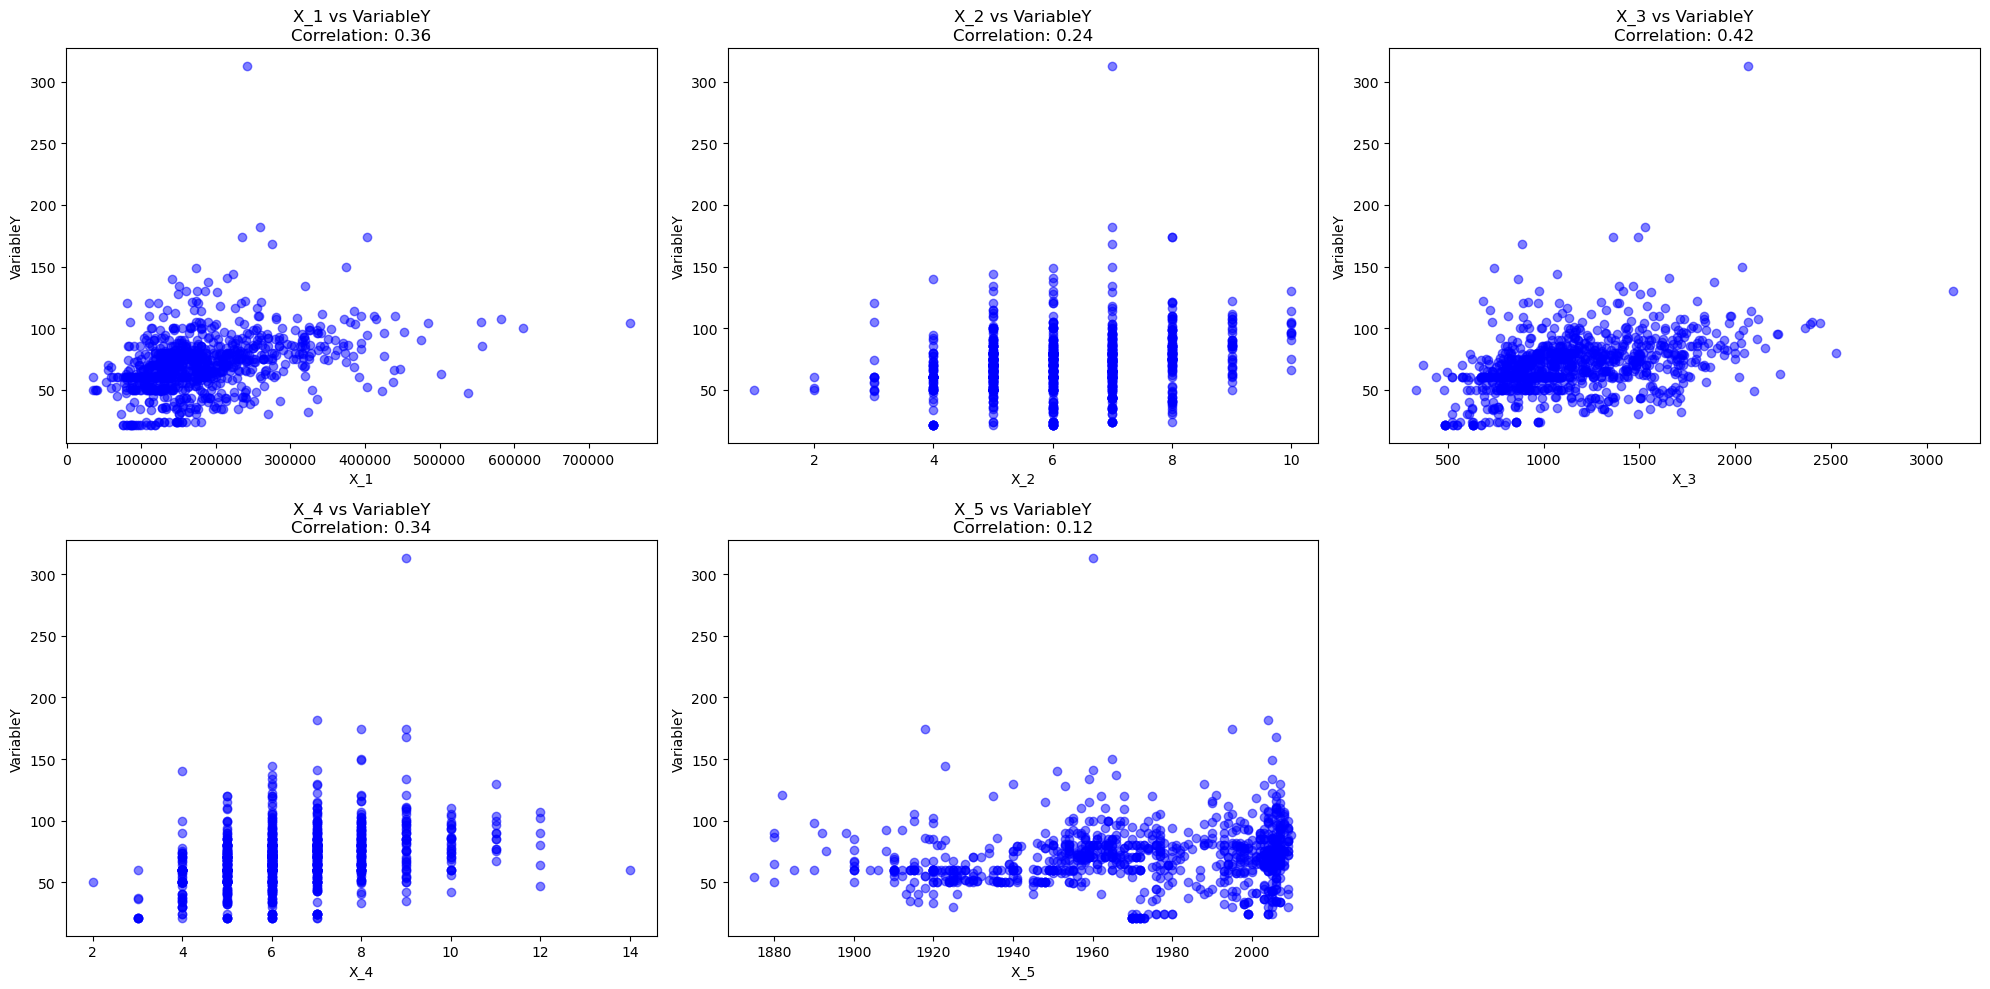

In [28]:
plt.figure(figsize=(20, 10))
for i, (var, corr_coeff) in enumerate(correlation_coeffs.items(), 1):
    plt.subplot(2, 3, i)
    x = train_df[var].loc[common_indices]  # Asegúrate de usar los mismos índices comunes
    y = train_df['VariableY'].loc[common_indices]
    plt.scatter(x, y, color='blue', alpha=0.5)
    plt.title(f'{var} vs VariableY\nCorrelation: {corr_coeff:.2f}')
    plt.xlabel(var)
    plt.ylabel('VariableY')
plt.tight_layout()
plt.show()

In [29]:
variables_sorted_by_corr = sorted(correlation_coeffs, key=correlation_coeffs.get, reverse=True)[:2]
print(f'Las variables con más potencial predictivo son: {variables_sorted_by_corr[0]} y {variables_sorted_by_corr[1]} con coeficientes de correlación de {correlation_coeffs[variables_sorted_by_corr[0]]:.2f} y {correlation_coeffs[variables_sorted_by_corr[1]]:.2f}, respectivamente.')


Las variables con más potencial predictivo son: X_3 y X_1 con coeficientes de correlación de 0.42 y 0.36, respectivamente.
